<a href="https://colab.research.google.com/github/satwik30/satwik30/blob/main/Wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier

In [ ]:
df=pd.read_csv("wines.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


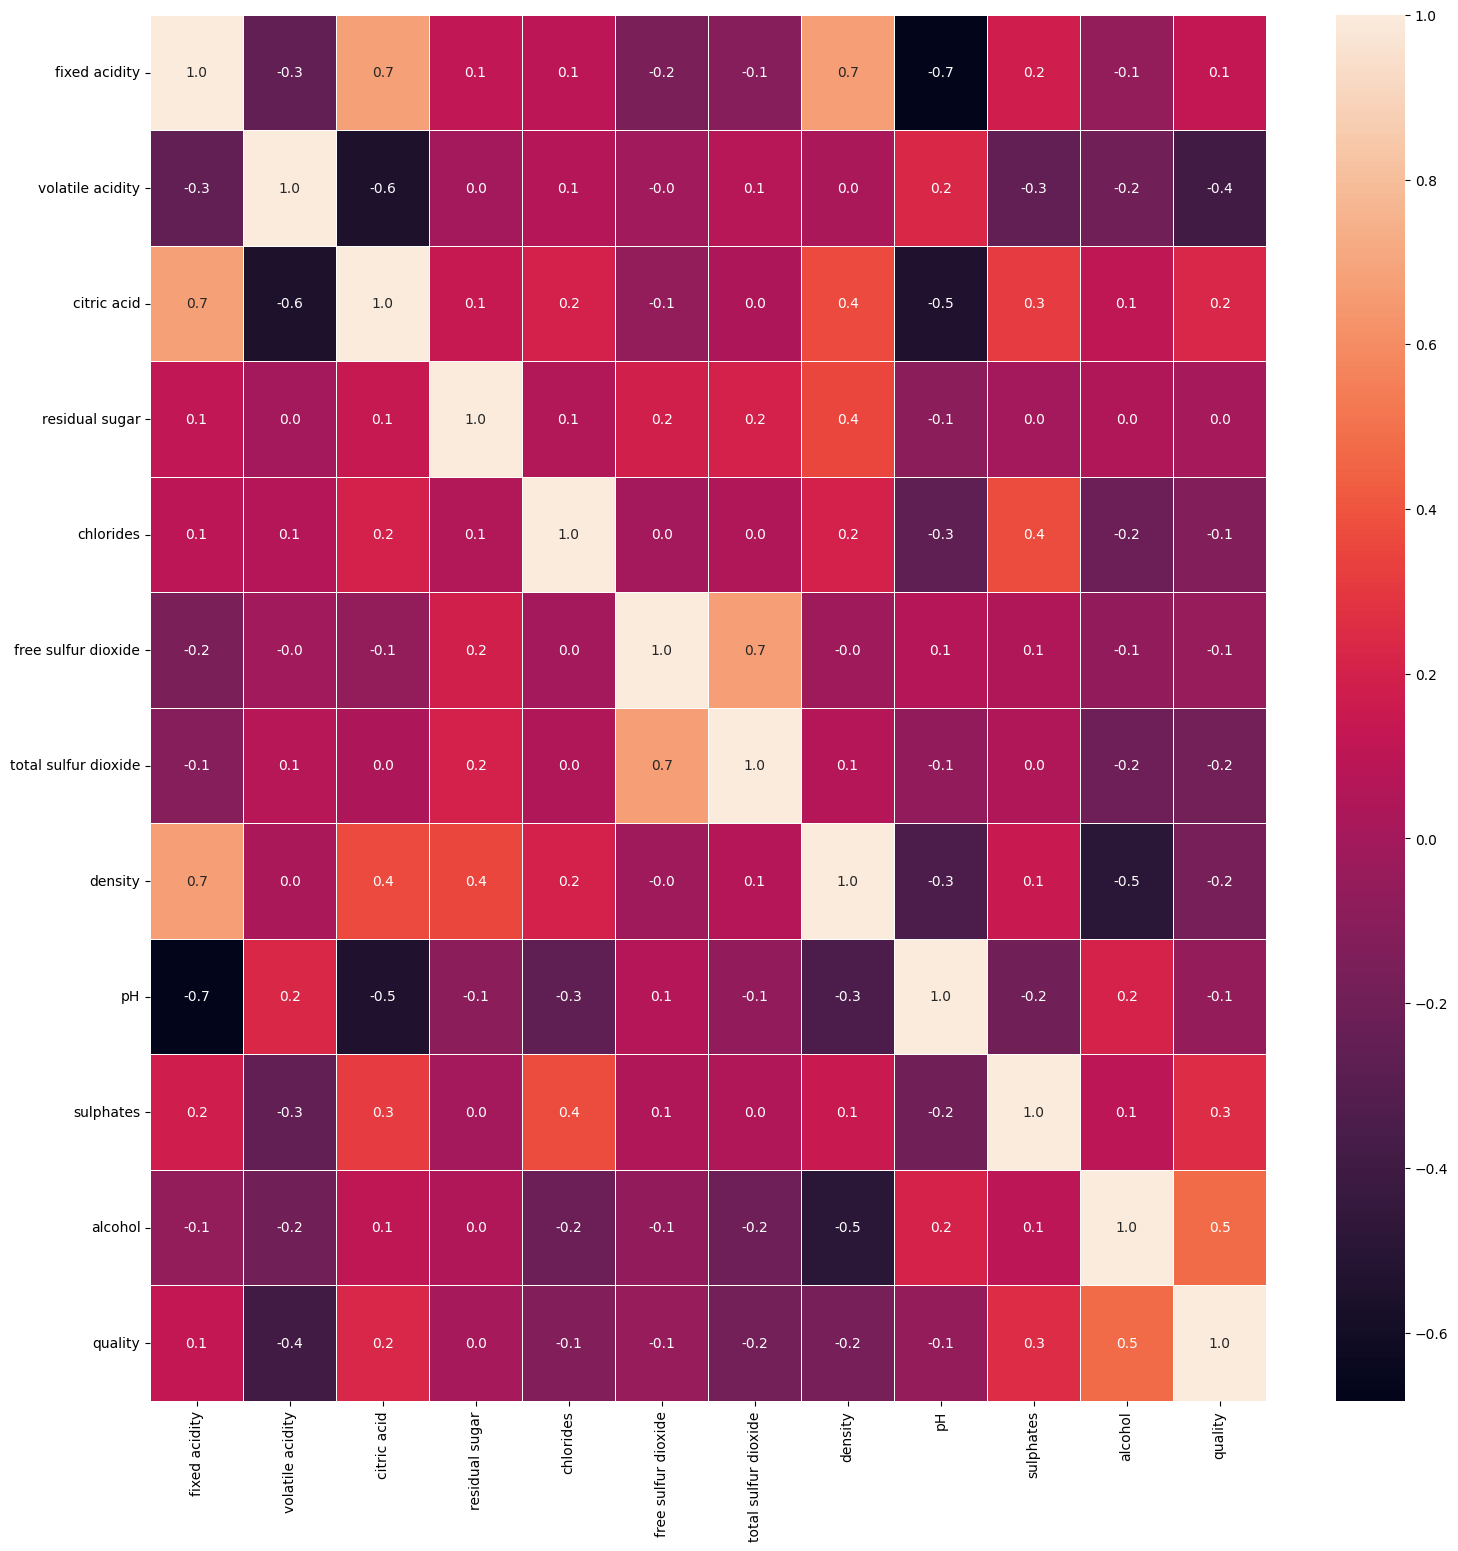

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


In [ ]:
# Data Visualization

In [ ]:
features = df.columns[:-1].values
label = [df.columns[-1]]

print ("The Features are:", features)
print ("The Label is:", label)

The Features are: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
The Label is: ['quality']


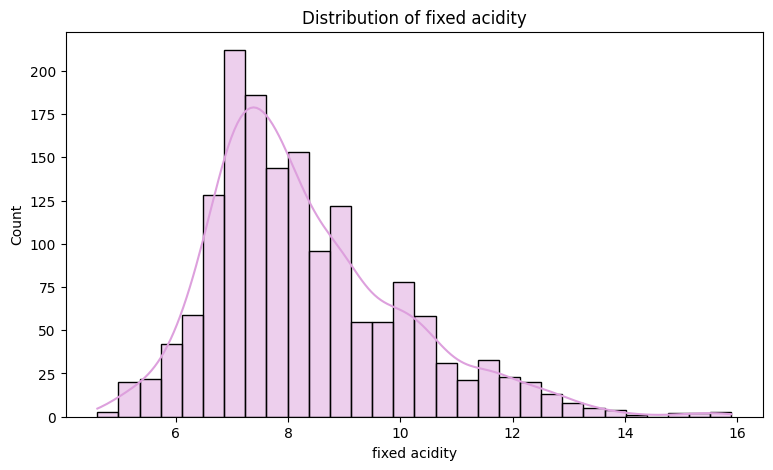

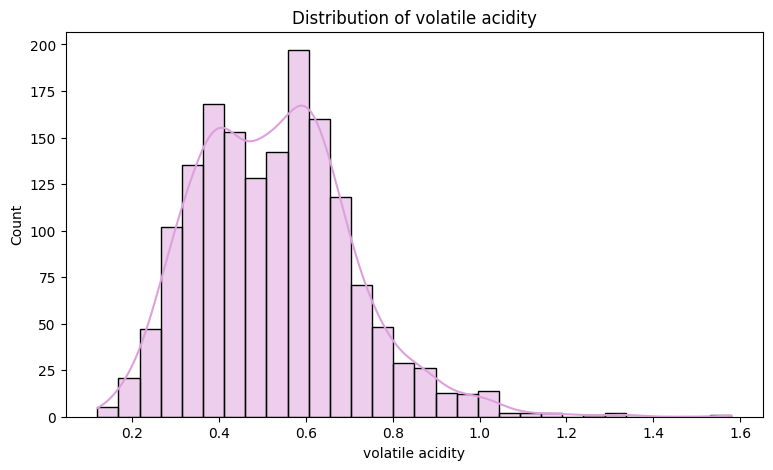

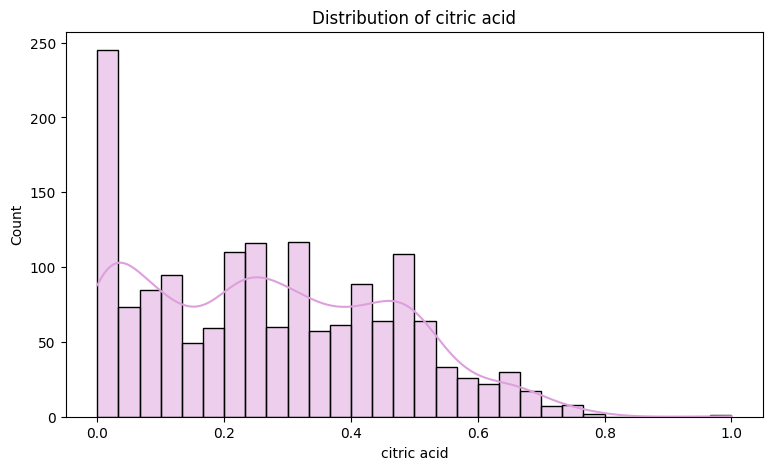

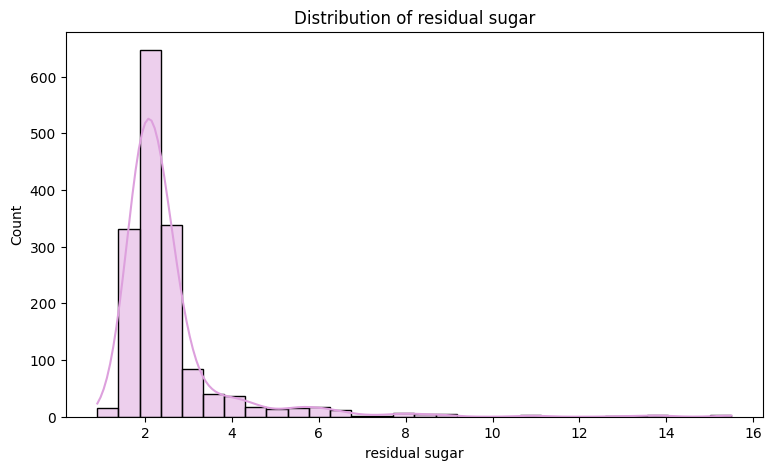

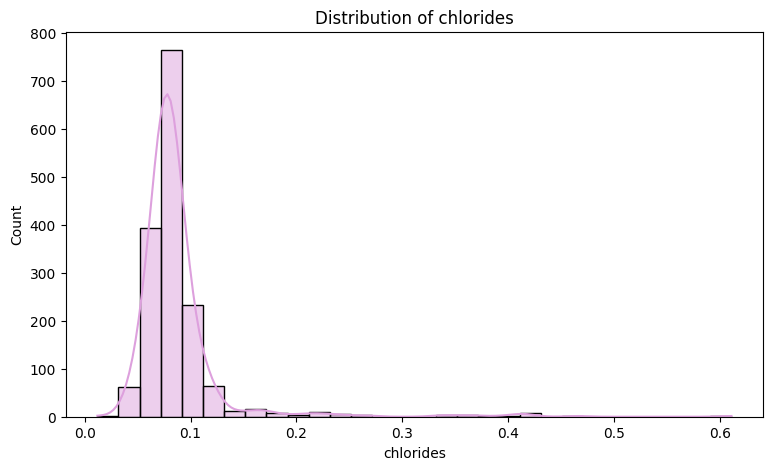

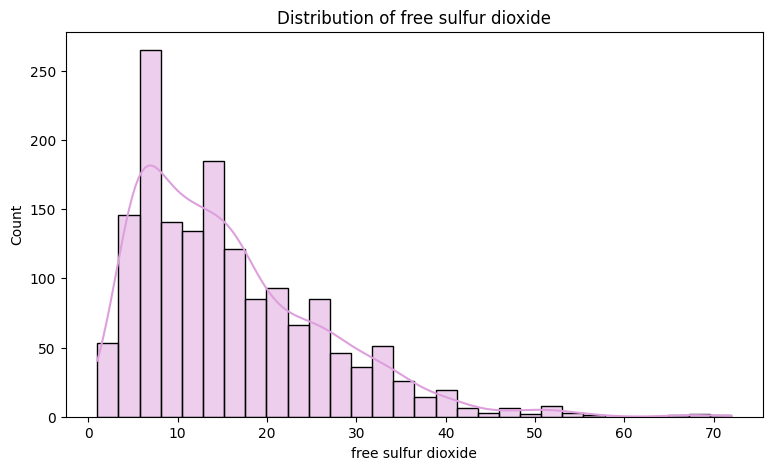

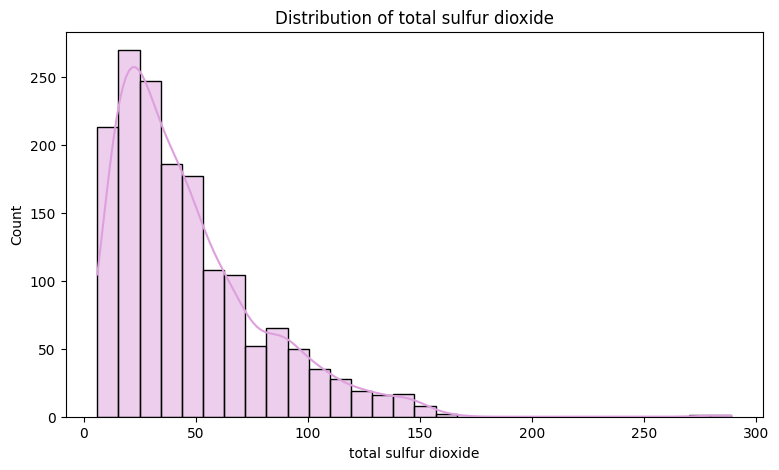

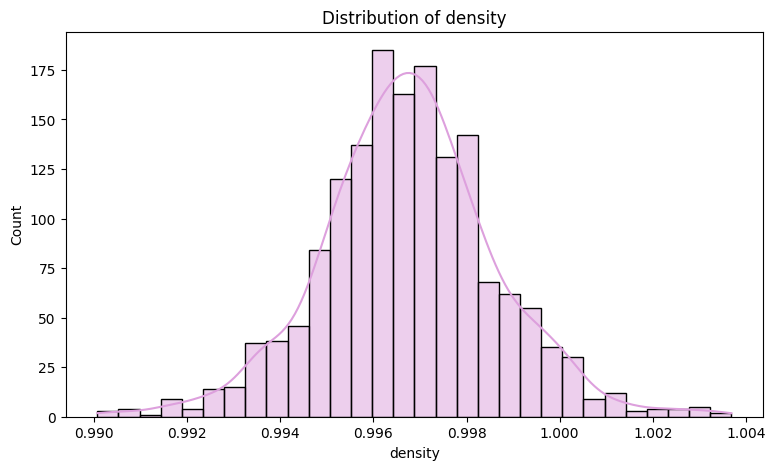

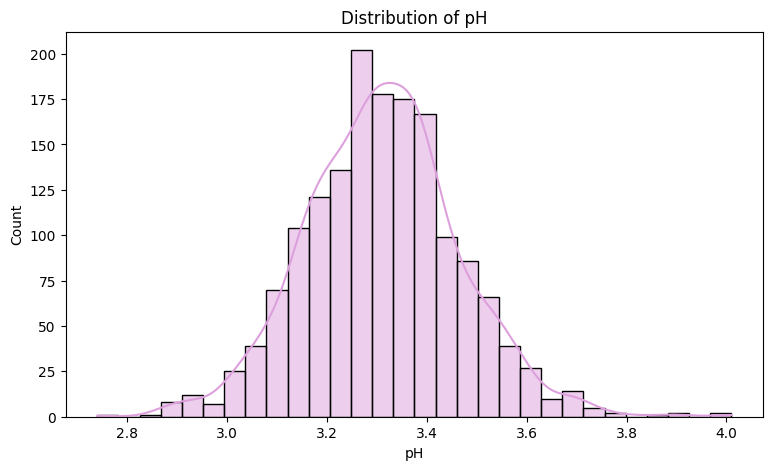

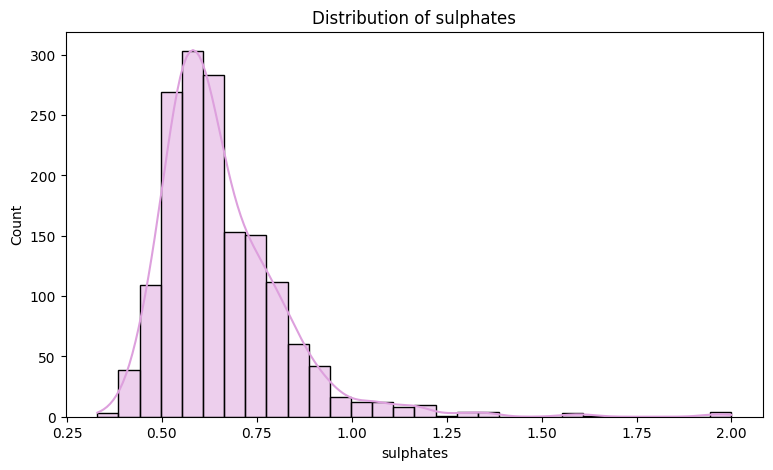

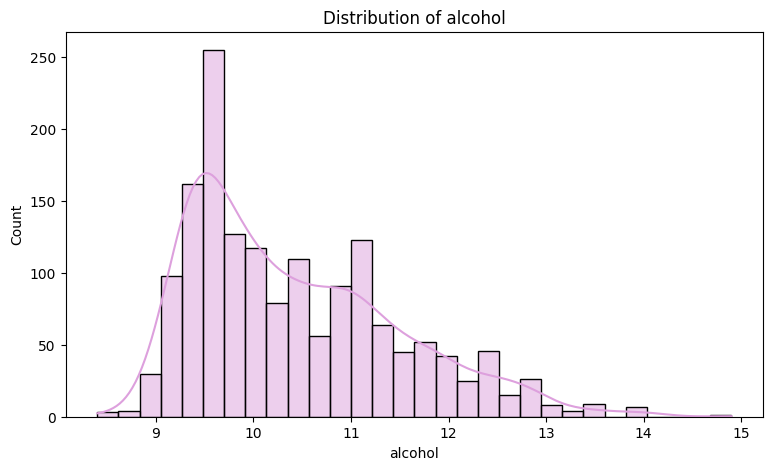

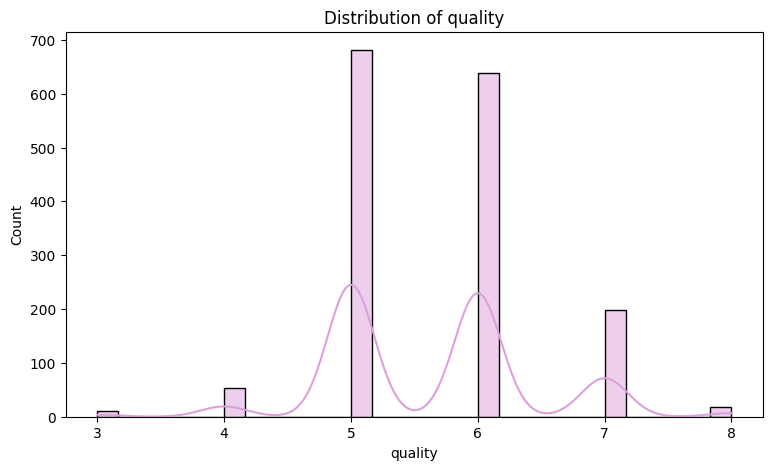

In [ ]:
# Plot histogram for each column
for column in df:
    plt.figure(figsize=(9, 5))
    sns.histplot(data=df, x=column, kde=True, bins=30, color='#DDA0DD')
    plt.title(f'Distribution of {column}')
    plt.show()

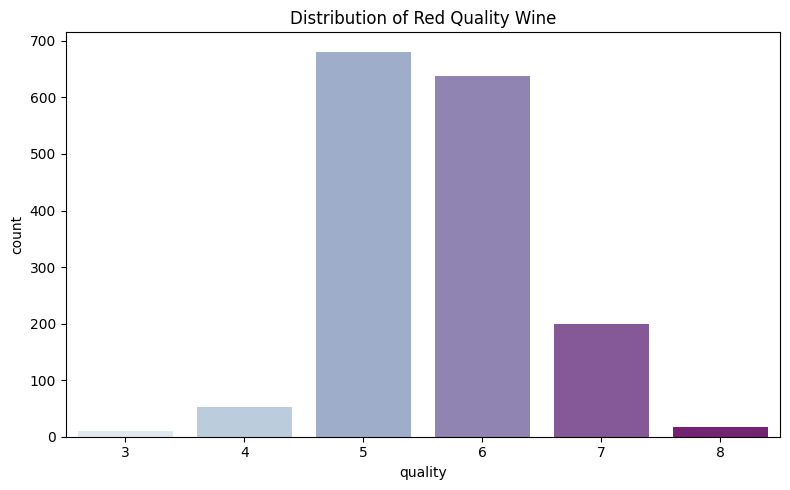

In [ ]:
# Set custom labels
labels = ["3", "4", "5", "6", "7", "8"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='quality', ax=ax, palette=sns.color_palette("BuPu"))
ax.set_title('Distribution of Red Quality Wine')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
labels = ["3", "4", "5", "6", "7", "8"]

# Quality Distribution
content_type = df.groupby(['quality']).size().reset_index(name='counts')

# Map the quality of red wine to specific labels
content_type['quality_label'] = content_type['quality'].map(dict(zip(range(3, 9), labels)))

# Plot the red wine quality distribution
fig = px.pie(content_type,
             names='quality_label',
             values='counts',
             color_discrete_sequence=px.colors.sequential.Agsunset,
             title='Distribution of Red Wine Quality',
             height=500,
             width=700)

# Include legend and labels
fig.update_layout(
    legend_title="Quality",
    legend=dict(
        x=0.8,
        y=1.0
    )
)

fig.show()

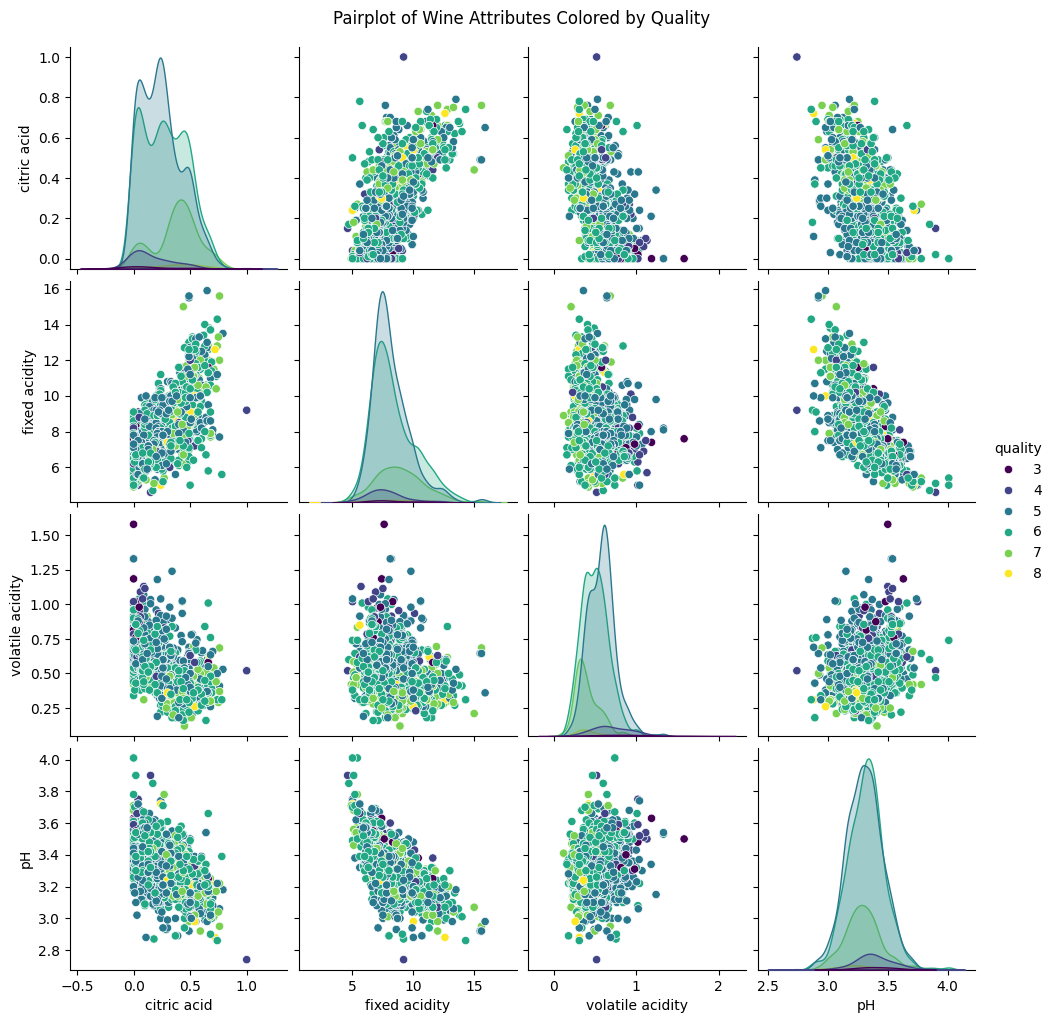

In [ ]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

acid_attributes = ['citric acid', 'fixed acidity', 'volatile acidity', 'pH', 'quality']

# Create and show the pairplot with colors based on the red wine quality
pairplot = sns.pairplot(df[acid_attributes], hue='quality', palette='viridis')

# Adjust legens and titles if is necessary
pairplot.fig.suptitle('Pairplot of Wine Attributes Colored by Quality', y=1.02)

plt.show()


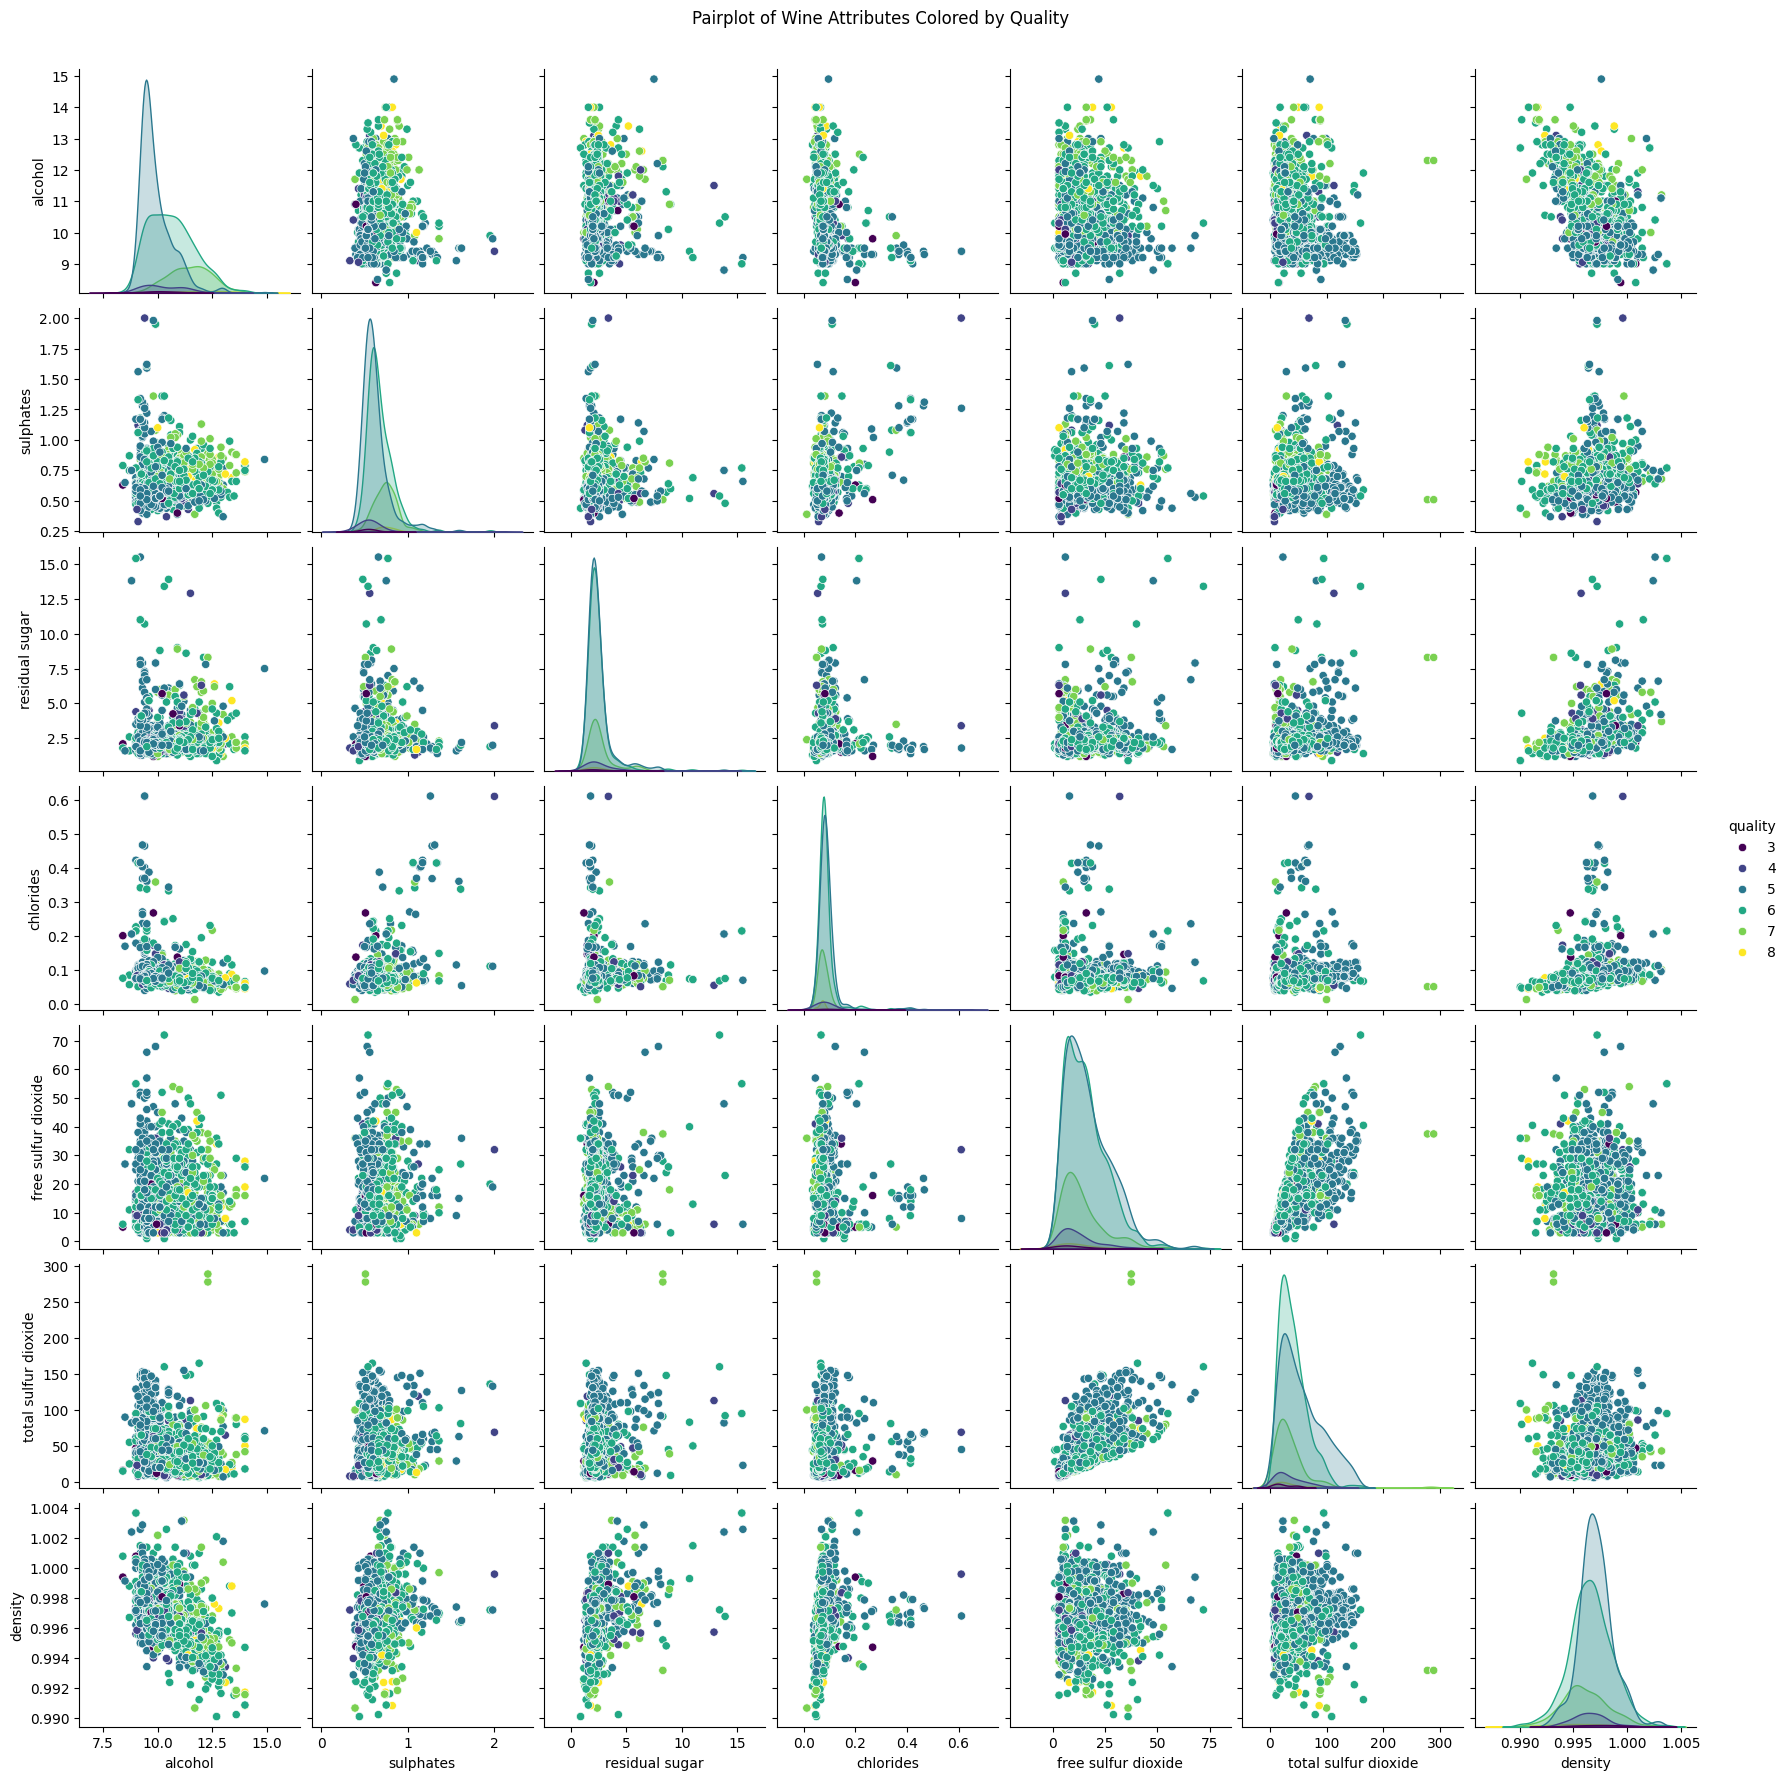

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

other_attributes = ['alcohol', 'sulphates', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'quality']

pairplot = sns.pairplot(df[other_attributes], hue='quality', palette='viridis')

pairplot.fig.suptitle('Pairplot of Wine Attributes Colored by Quality', y=1.02)

plt.show()

In [ ]:
# Data preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(df, test_size=0.1, random_state=42)

In [ ]:
len(train_dataset)

1439

In [ ]:
len(test_dataset)

160

In [ ]:
 # StratifiedShuffleSplit

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in sss.split(df, df["quality"]):
  strat_train_dataset = df.loc[train_index]
  strat_test_dataset = df.loc[test_index]

In [ ]:
train_index, test_index= next(sss.split(df, df["quality"]))
strat_train_dataset = df.loc[train_index]
strat_test_dataset = df.loc[test_index]

In [ ]:
strat_train_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1070,9.3,0.33,0.45,1.5,0.057,19.0,37.0,0.99498,3.18,0.89,11.1,7
563,7.6,0.29,0.49,2.7,0.092,25.0,60.0,0.99710,3.31,0.61,10.1,6
523,9.3,0.40,0.49,2.5,0.085,38.0,142.0,0.99780,3.22,0.55,9.4,5
1227,9.0,0.58,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5
1399,7.2,0.67,0.00,2.2,0.068,10.0,24.0,0.99560,3.42,0.72,11.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1385,8.0,0.81,0.25,3.4,0.076,34.0,85.0,0.99668,3.19,0.42,9.2,5
1057,7.6,0.42,0.25,3.9,0.104,28.0,90.0,0.99784,3.15,0.57,9.1,5
615,9.6,0.60,0.50,2.3,0.079,28.0,71.0,0.99970,3.50,0.57,9.7,5
504,10.5,0.24,0.42,1.8,0.077,6.0,22.0,0.99760,3.21,1.05,10.8,7


In [ ]:
strat_test_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
609,6.3,0.360,0.19,3.2,0.075,15.0,39.0,0.99560,3.56,0.52,12.7,6
605,8.3,0.600,0.13,2.6,0.085,6.0,24.0,0.99840,3.31,0.59,9.2,6
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
1482,7.2,0.580,0.54,2.1,0.114,3.0,9.0,0.99719,3.33,0.57,10.3,4
340,12.2,0.340,0.50,2.4,0.066,10.0,21.0,1.00000,3.12,1.18,9.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
768,7.1,0.590,0.02,2.3,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,6
636,9.6,0.880,0.28,2.4,0.086,30.0,147.0,0.99790,3.24,0.53,9.4,5
915,8.6,0.315,0.40,2.2,0.079,3.0,6.0,0.99512,3.27,0.67,11.9,6
1347,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.5,5


In [ ]:
strat_train_distribution = strat_train_dataset["quality"].value_counts() / len(strat_train_dataset)
strat_train_distribution

,count
quality,
5,0.425990
6,0.398888
7,0.124392
4,0.033356
8,0.011119
3,0.006254


In [ ]:
strat_test_distribution = strat_test_dataset["quality"].value_counts() / len(strat_test_dataset)
strat_test_distribution

,count
quality,
5,0.42500
6,0.40000
7,0.12500
4,0.03125
8,0.01250
3,0.00625


In [ ]:
# Separate features and labels

In [ ]:
features_train = strat_train_dataset.drop("quality", axis=1)

labels_train = strat_train_dataset['quality'].copy()

In [ ]:
features_test = strat_test_dataset.drop("quality", axis=1)

labels_test = strat_test_dataset['quality'].copy()

In [ ]:
features_train.shape

(1439, 11)

In [ ]:
labels_train.shape[0]

1439

In [ ]:
features_test.shape

(160, 11)

In [ ]:
labels_test.shape[0]

160

In [ ]:
# Normalization

In [ ]:
# Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(features_train)

# Transform the data
scaled_features_train = scaler.transform(features_train)

In [ ]:
scaled_features_train

array([[ 0.56873649, -1.10303742,  0.90829391, ..., -0.84540644,
         1.31475174,  0.62763008],
       [-0.42087876, -1.32735891,  1.1148581 , ...,  0.0055954 ,
        -0.29804669, -0.3082382 ],
       [ 0.56873649, -0.71047481,  1.1148581 , ..., -0.58355972,
        -0.64364635, -0.963346  ],
       ...,
       [ 0.74337448,  0.41113266,  1.16649915, ...,  1.24936733,
        -0.52844646, -0.68258551],
       [ 1.26728844, -1.60776078,  0.75337076, ..., -0.6490214 ,
         2.23635083,  0.34686959],
       [ 1.15086311, -1.43951966, -0.17616811, ..., -0.58355972,
        -0.01004697,  2.21860615]])

In [ ]:
# Fit the scaler to the data
scaler.fit(features_test)

# Transform the data
scaled_features_test = scaler.transform(features_test)

In [ ]:
scaled_features_test

array([[-1.02937658, -0.96337594, -0.26093985, ...,  1.38587361,
        -0.87196816,  2.25670467],
       [ 0.00549777,  0.33555791, -0.55774346, ..., -0.11277317,
        -0.29511976, -1.12684182],
       [-0.87414543,  1.06620821, -1.10188343, ...,  0.84636077,
        -0.78956124, -0.45013252],
       ...,
       [ 0.16072892, -1.20692604,  0.77787281, ..., -0.35255666,
         0.36413555,  1.48332261],
       [-0.56368312,  0.63323025, -1.05241616, ...,  0.06706444,
        -1.94325804, -0.83682355],
       [-0.61542684,  1.06620821, -0.40934165, ..., -0.35255666,
         0.11691481, -1.03016906]])

In [ ]:
# Build models and Evaluation

In [ ]:
# Classification models with default parameters
Classification_models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier': SGDClassifier(),
    'Support Vector Machine': SVC(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

In [ ]:
model_names = []
accuracies = []

# Train and evaluate each model
for name, clf in Classification_models.items():
    clf.fit(scaled_features_train, labels_train)
    predictions = clf.predict(scaled_features_test)
    score = clf.score(scaled_features_test, labels_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

# Create a DataFrame for model accuracies
models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=models, palette='BuPu')
plt.title('Accuracies reached by each model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=60)
plt.show()

In [ ]:
# The Random Forest model obtained the best accuracy performed in this notebook, attaining an accuracy higher of 70%. Therefore, we recommend employing the Random Forest model for the red wine classification task.